# Seaice freezing from SOSE

### Import packages

In [1]:
import numpy as np
import xarray as xr
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib as mpl
import matplotlib.patches as mpatches
import pandas as pd
from sklearn import manifold
import seaborn as sns
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmocean.cm as cmo
import cmocean
from xhistogram.xarray import histogram
### os tools
import os.path
from glob import glob
import file_io as io
import density
import random
import gsw

### Read in sea ice freezing data (created from SOSE data in Matlab)

In [2]:
# load winter sea ice freezing maps
dp = io.load_sose_SIfreeze()

# show contents
dp

<xarray.Dataset>
Dimensions:   (lon: 2160, lat: 198)
Coordinates:
  * lon       (lon) float64 -179.9 -179.8 -179.6 -179.4 ... 179.6 179.8 179.9
  * lat       (lat) float64 -77.87 -77.71 -77.54 -77.37 ... -45.37 -45.21 -45.04
Data variables:
    SIfreeze  (lat, lon) float64 ...
Attributes:
    Source:       SOSE iteration 100, 2005-2010
    Source URL:   http://sose.ucsd.edu/sose_stateestimation_data_05to10.html
    Description:  JAS (Austral winter) average 2005-2010

In [3]:
# show contents of SIfreeze variable 
dp.SIfreeze

<xarray.DataArray 'SIfreeze' (lat: 198, lon: 2160)>
[427680 values with dtype=float64]
Coordinates:
  * lon      (lon) float64 -179.9 -179.8 -179.6 -179.4 ... 179.6 179.8 179.9
  * lat      (lat) float64 -77.87 -77.71 -77.54 -77.37 ... -45.37 -45.21 -45.04
Attributes:
    Units:          [kg/m^2/s]
    Long name:      Seaice package: Ocean surface freshwater flux
    Variable name:  SIfreeze
    Threshold:      1e-05
    Convention:     > 0 increases salt

In [4]:
# load fronts
pf = io.load_front("fronts/pf_kim.txt")
saccf = io.load_front("fronts/saccf_kim.txt")
saf = io.load_front("fronts/saf_kim.txt")
sbdy = io.load_front("fronts/sbdy_kim.txt")

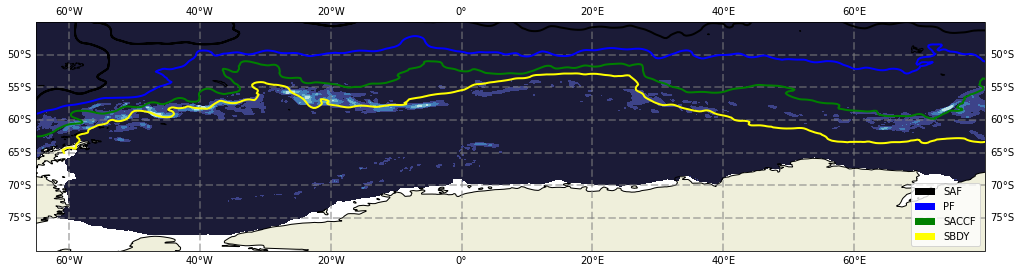

In [5]:
# select geographic extent of the plot
lon_min = -65
lon_max =  80
lat_min = -80
lat_max = -45

# make plot
plt.figure(figsize=(17, 13))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([lon_min, lon_max, lat_min, lat_max], ccrs.PlateCarree())

# contour plot of sea ice freezing
h = ax.contourf(dp.lon, dp.lat, dp.SIfreeze,
                levels=[0.0, 2e-5, 4e-5, 6e-5, 8e-5, 10e-5],
                transform=ccrs.PlateCarree(), vmin=0.0, vmax=10e-5,
                cmap=cmocean.cm.ice)

# fronts
h_saf = plt.plot(saf[:,0], saf[:,1], color="black", linewidth=2.0, transform=ccrs.Geodetic())
h_pf = plt.plot(pf[:,0], pf[:,1], color="blue", linewidth=2.0, transform=ccrs.Geodetic())
h_saccf = plt.plot(saccf[:,0], saccf[:,1], color="green", linewidth=2.0, transform=ccrs.Geodetic())
h_sbdy = plt.plot(sbdy[:,0], sbdy[:,1], color="yellow", linewidth=2.0, transform=ccrs.Geodetic())
ax.coastlines(resolution='50m')
ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
             linewidth=2, color='gray', alpha=0.5, linestyle='--')
ax.add_feature(cartopy.feature.LAND)

# make two proxy artists to add to a legend
l_saf = mpatches.Rectangle((0, 0), 1, 1, facecolor="black")
l_pf = mpatches.Rectangle((0, 0), 1, 1, facecolor="blue")
l_saccf = mpatches.Rectangle((0, 0), 1, 1, facecolor="green")
l_sbdy = mpatches.Rectangle((0, 0), 1, 1, facecolor="yellow")
labels = ['SAF', 'PF', 'SACCF', 'SBDY']
plt.legend([l_saf, l_pf, l_saccf, l_sbdy], labels,
           loc='lower right', fancybox=True)

# save figure
plt.savefig("seaice/SeaIceFreezing_SOSE_winter.png", bbox_inches="tight")
plt.savefig("seaice/SeaIceFreezing_SOSE_winter.pdf", bbox_inches="tight")
plt.show()
plt.close()

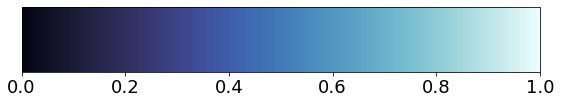

In [6]:
# separate colorbar
a = np.array([[0.0, 1.0]])    # 1e-4
plt.figure(figsize=(9, 1.5))
img = plt.imshow(a, cmap=cmocean.cm.ice)
plt.gca().set_visible(False)
cax = plt.axes([0.1, 0.2, 0.8, 0.6])
cbar = plt.colorbar(orientation="horizontal", cax=cax)
cbar.ax.tick_params(labelsize=18)
plt.savefig('seaice/hist_colorbar.pdf', bbox_inches='tight')
plt.savefig('seaice/hist_colorbar.png', bbox_inches='tight')
plt.show()
plt.close()